# <center><span style="color:orange;">NUMPY</span></center>

## Further reading

 * [Python](http://www.python.org). The official Python web site.
 * [Python tutorials](http://docs.python.org/2/tutorial). The official Python tutorials.
 * [Think Python](http://www.greenteapress.com/thinkpython). A free book on Python.

# Numpy - multidimensional data arrays

In [1]:
# what is this line all about?!? Answer coming soon.
%matplotlib inline

## Why `numpy`?

Performance and ease of use.

The `numpy` package (module) is used in almost all numerical computation using Python. It is a package that provide high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are vectorized (formulated with vectors and matrices), performance is very good. 

To use `numpy` need to import the module it using of example:

In [27]:
import numpy as np
import matplotlib.pyplot as pl

In the `numpy` package the terminology used for vectors, matrices and higher-dimensional data sets is *array*. 



## Creating `numpy` arrays

There are a number of ways to initialize new numpy arrays, for example from

* a Python list or tuples
* using functions that are dedicated to generating numpy arrays, such as `arange`, `linspace`, etc.
* reading data from files

### From lists

For example, to create new vector and matrix arrays from Python lists we can use the `numpy.array` function.

In [3]:
# a vector: the argument to the array function is a Python list
lst = [1,2.,3j,4]
v = np.array(lst)

v, v.dtype

(array([ 1.+0.j,  2.+0.j,  0.+3.j,  4.+0.j]), dtype('complex128'))

In [5]:
# a matrix: the argument to the array function is a nested Python list
M = np.array([[1, 2, 3], [3, 4,3], [7,1,6]], dtype=np.float128)

M

array([[ 1.0,  2.0,  3.0],
       [ 3.0,  4.0,  3.0],
       [ 7.0,  1.0,  6.0]], dtype=float128)

The `v` and `M` objects are both of the type `ndarray` that the `numpy` module provides.

In [6]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

The difference between the `v` and `M` arrays is only their shapes. We can get information about the shape of an array by using the `ndarray.shape` property.

In [7]:
M.shape

(3, 3)

In [8]:
v.shape, v.dtype

((4,), dtype('complex128'))

The number of elements in the array is available through the `ndarray.size` property:

In [11]:
M.size

9

So far the `numpy.ndarray` looks awefully much like a Python list (or nested list). Why not simply use Python lists for computations instead of creating a new array type? 

There are several reasons:

* Python lists are very general. They can contain any kind of object. They are dynamically typed. They do not support mathematical functions such as matrix and dot multiplications, etc. Implementating such functions for Python lists would not be very efficient because of the dynamic typing.
* Numpy arrays are **statically typed** and **homogeneous**. The type of the elements is determined when array is created.
* Numpy arrays are memory efficient.
* Because of the static typing, fast implementation of mathematical functions such as multiplication and addition of `numpy` arrays can be implemented in a compiled language (C and Fortran is used).

Using the `dtype` (data type) property of an `ndarray`, we can see what type the data of an array has:

In [12]:
M.dtype, type(M)

(dtype('float128'), numpy.ndarray)

We get an error if we try to assign a value of the wrong type to an element in a numpy array:

In [13]:
M[0,1] = 1.2

In [14]:
M[1,1]=2.1
M

array([[ 1.0,  1.2,  3.0],
       [ 3.0,  2.1,  3.0],
       [ 7.0,  1.0,  6.0]], dtype=float128)

If we want, we can explicitly define the type of the array data when we create it, using the `dtype` keyword argument: 

In [15]:
M = np.array([[1, 2], [3, 4]], dtype=float)

M

array([[ 1.,  2.],
       [ 3.,  4.]])

In [16]:
M[1,1]=2.1

M

array([[ 1. ,  2. ],
       [ 3. ,  2.1]])

Common type that can be used with `dtype` are: `int`, `float`, `complex`, `bool`, `object`, etc.

We can also explicitly define the bit size of the data types, for example: `int64`, `int16`, `float128`, `complex128`.

### Using array-generating functions

For larger arrays it is inpractical to initialize the data manually, using explicit python lists. Instead we can use one of the many functions in `numpy` that generates arrays of different forms. Some of the more common are:

#### arange

In [17]:
# create a range

x = np.arange(0, 10, 1) # arguments: start, stop, step

x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### linspace and logspace

In [18]:
# using linspace, both end points ARE included
np.linspace(0, 10, 25)

array([  0.        ,   0.41666667,   0.83333333,   1.25      ,
         1.66666667,   2.08333333,   2.5       ,   2.91666667,
         3.33333333,   3.75      ,   4.16666667,   4.58333333,
         5.        ,   5.41666667,   5.83333333,   6.25      ,
         6.66666667,   7.08333333,   7.5       ,   7.91666667,
         8.33333333,   8.75      ,   9.16666667,   9.58333333,  10.        ])

In [19]:
np.logspace(0, 10, 10, base=np.pi)

array([  1.00000000e+00,   3.56770344e+00,   1.27285079e+01,
         4.54115413e+01,   1.62014912e+02,   5.78021160e+02,
         2.06220808e+03,   7.35734687e+03,   2.62488318e+04,
         9.36480475e+04])

#### zeros and ones

In [20]:
np.zeros((5,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [21]:
np.ones((3,3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

## Reading Data from Files

### Comma-separated values (CSV)

A very common file format for data files are the comma-separated values (CSV), or related format such as TSV (tab-separated values). To read data from such file into Numpy arrays we can use the `numpy.genfromtxt` function. For example, 

In [22]:
!head data/ftir_data.csv

In [23]:
np.genfromtxt?

In [24]:
data = np.genfromtxt('data/ftir_data.csv', delimiter=';')

In [25]:
print (data.shape)
print (data)

(2843, 2)
[[  1.25930900e+03   2.90556700e+00]
 [  1.26027300e+03   2.84589900e+00]
 [  1.26123700e+03   2.82877400e+00]
 ..., 
 [  3.99777500e+03   7.43488100e-01]
 [  3.99873900e+03   7.44366000e-01]
 [  3.99970400e+03   7.45130200e-01]]


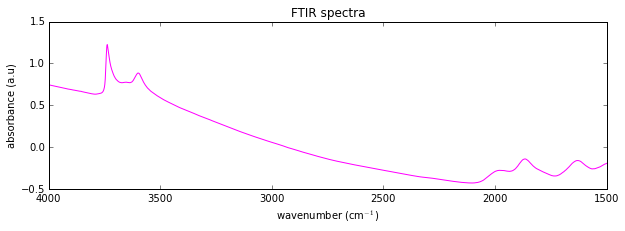

In [28]:
fig, ax = pl.subplots(figsize=(10,3))
w = data[:,0]
a = data[:,1]
ax.plot(w, a, 'magenta')
ax.set_title('FTIR spectra')
ax.set_xlabel('wavenumber (cm$^{-1}$)')
ax.set_ylabel('absorbance (a.u)')
ax.set_xlim(4000,1500)
ax.set_ylim(-0.5,1.5)
fig.savefig('data/myfirst.jpg')

Using `numpy.savetxt` we can store a Numpy array to a file in CSV format:

In [29]:
M = np.random.rand(3,3)

M

array([[ 0.68206682,  0.00388183,  0.24917151],
       [ 0.25527822,  0.56430446,  0.19555687],
       [ 0.35204991,  0.55101161,  0.71688811]])

In [30]:
np.savetxt("data/random-matrix.csv", M)

In [31]:
!cat random-matrix.csv

5.70e-01 7.58e-01 5.26e-01
8.63e-01 2.37e-01 1.23e-01
4.04e-01 2.57e-01 7.85e-01


In [32]:
np.savetxt("random-matrix.csv", M, fmt='%.2e') # fmt specifies the format

!cat random-matrix.csv

6.82e-01 3.88e-03 2.49e-01
2.55e-01 5.64e-01 1.96e-01
3.52e-01 5.51e-01 7.17e-01


## Manipulating arrays

### Indexing

We can index elements in an array using the square bracket and indices:

In [33]:
lst = [1.,2.,3.,4.]
v = np.array(lst)
print(v)
# v is a vector, and has only one dimension, taking one index
v[-2]

[ 1.  2.  3.  4.]


3.0

In [34]:
# M is a matrix, or a 2 dimensional array, taking two indices 
M[0,2]

0.24917150614874073

If we omit an index of a multidimensional array it returns the whole row (or, in general, a N-1 dimensional array) 

In [35]:
M

array([[ 0.68206682,  0.00388183,  0.24917151],
       [ 0.25527822,  0.56430446,  0.19555687],
       [ 0.35204991,  0.55101161,  0.71688811]])

In [36]:
M[1]

array([ 0.25527822,  0.56430446,  0.19555687])

The same thing can be achieved with using `:` instead of an index: 

In [37]:
M[1,:] # row 1

array([ 0.25527822,  0.56430446,  0.19555687])

In [38]:
M[:,1] # column 1

array([ 0.00388183,  0.56430446,  0.55101161])

We can assign new values to elements in an array using indexing:

In [39]:
M[:,:] = 0 

In [40]:
M

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [41]:
# also works for rows and columns
M[1,:] = 2
M[:,2] = -1

In [42]:
M

array([[ 0.,  0., -1.],
       [ 2.,  2., -1.],
       [ 0.,  0., -1.]])

### Index slicing

Index slicing is the technical name for the syntax `M[lower:upper:step]` to extract part of an array:

In [43]:
A = np.array([1,2,3,4,5])
A

array([1, 2, 3, 4, 5])

In [44]:
A[1:3]

array([2, 3])

Array slices are *mutable*: if they are assigned a new value the original array from which the slice was extracted is modified:

In [45]:
A[1:3] = [-2,-3]

A

array([ 1, -2, -3,  4,  5])

We can omit any of the three parameters in `M[lower:upper:step]`:

In [46]:
A[::] # lower, upper, step all take the default values

array([ 1, -2, -3,  4,  5])

In [47]:
A[::2] # step is 2, lower and upper defaults to the beginning and end of the array

array([ 1, -3,  5])

In [48]:
A[:3] # first three elements

array([ 1, -2, -3])

In [49]:
A[3:] # elements from index 3

array([4, 5])

Negative indices counts from the end of the array (positive index from the begining):

In [51]:
A = np.array([1,2,3,4,5])

In [52]:
A[-1] # the last element in the array

5

In [53]:
A[-3:] # the last three elements

array([3, 4, 5])

Index slicing works exactly the same way for multidimensional arrays:

In [54]:
m=1.
[n+m*15 for n in range(5)]

[15.0, 16.0, 17.0, 18.0, 19.0]

In [58]:
A = np.array([[np.sin((n/10.+(m/.100)**2)*np.pi) for n in range(5)] for m in range(5)])

A

array([[  0.00000000e+00,   3.09016994e-01,   5.87785252e-01,
          8.09016994e-01,   9.51056516e-01],
       [  1.96438672e-15,   3.09016994e-01,   5.87785252e-01,
          8.09016994e-01,   9.51056516e-01],
       [  7.85754689e-15,   3.09016994e-01,   5.87785252e-01,
          8.09016994e-01,   9.51056516e-01],
       [ -1.52850776e-13,   3.09016994e-01,   5.87785252e-01,
          8.09016994e-01,   9.51056516e-01],
       [  3.14301876e-14,   3.09016994e-01,   5.87785252e-01,
          8.09016994e-01,   9.51056516e-01]])

In [59]:
# a block from the original array
A[1:4, 1:4]

array([[ 0.30901699,  0.58778525,  0.80901699],
       [ 0.30901699,  0.58778525,  0.80901699],
       [ 0.30901699,  0.58778525,  0.80901699]])

In [60]:
# strides
A[:4:2, :4:2]

array([[  0.00000000e+00,   5.87785252e-01],
       [  7.85754689e-15,   5.87785252e-01]])

### Fancy indexing

Fancy indexing is the name for when an array or list is used in-place of an index: 

In [61]:
row_indices = [1, 4]
A[row_indices]

array([[  1.96438672e-15,   3.09016994e-01,   5.87785252e-01,
          8.09016994e-01,   9.51056516e-01],
       [  3.14301876e-14,   3.09016994e-01,   5.87785252e-01,
          8.09016994e-01,   9.51056516e-01]])

In [62]:
col_indices = [1, 2, -1] # remember, index -1 means the last element
A[row_indices, col_indices]

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (2,) (3,) 

We can also index masks: If the index mask is an Numpy array of with data type `bool`, then an element is selected (True) or not (False) depending on the value of the index mask at the position each element: 

In [63]:
B = np.arange(5)
B

array([0, 1, 2, 3, 4])

In [66]:
row_mask = np.array([True, False, True, False, False])
B[row_mask]

array([0, 2])

In [68]:
# same thing
row_mask = np.array([1,0,0,1,0], dtype=bool)
B[row_mask]

array([0, 3])

In [69]:
mask = (w < 4000) & (w>3000)
print(mask)
data1 = data[mask]

[False False False ...,  True  True  True]


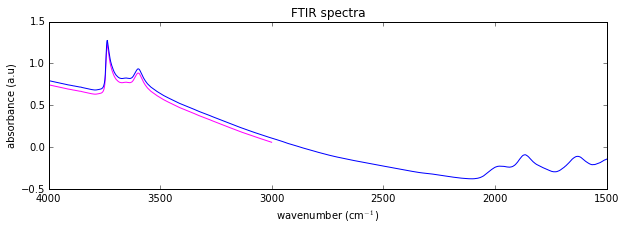

In [71]:
fig, ax = pl.subplots(figsize=(10,3))
w1 = data1[:,0]
a1 = data1[:,1]
ax.plot(w1, a1, 'magenta')
ax.set_title('FTIR spectra')
ax.set_xlabel('wavenumber (cm$^{-1}$)')
ax.set_ylabel('absorbance (a.u)')
ax.set_xlim(4000,1500)
ax.set_ylim(-0.5,1.5)

w = data[:,0]
a = data[:,1]+.05
ax.plot(w, a, 'blue')



This feature is very useful to conditionally select elements from an array, using for example comparison operators:

In [72]:
x = np.arange(0, 10, 0.5)
x

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

In [73]:
mask = (5 < x) * (x < 7.5)

mask

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False], dtype=bool)

In [74]:
x[mask]

array([ 5.5,  6. ,  6.5,  7. ])

## Functions for extracting data from arrays and creating arrays

### where

The index mask can be converted to position index using the `where` function

In [75]:
indices = np.where(mask)

indices

(array([11, 12, 13, 14]),)

In [76]:
x[indices] # this indexing is equivalent to the fancy indexing x[mask]

array([ 5.5,  6. ,  6.5,  7. ])

## Functions for extracting data from arrays and creating arrays

### diag

With the diag function we can also extract the diagonal and subdiagonals of an array:

In [77]:
np.diag(A)

array([ 0.        ,  0.30901699,  0.58778525,  0.80901699,  0.95105652])

In [78]:
np.diag(A, -1)

array([  1.96438672e-15,   3.09016994e-01,   5.87785252e-01,
         8.09016994e-01])

## Functions for extracting data from arrays and creating arrays

### choose

Constructs and array by picking elements form several arrays:

In [80]:
which = [1, 0, 1, 0]
choices = [[-2,-2,-2,-2], [5,5,5,5]]

np.choose(which, choices)

array([ 5, -2,  5, -2])

## Linear algebra

Vectorizing code is the key to writing efficient numerical calculation with Python/Numpy.

That means that as much as possible of a program should be formulated in terms of matrix and vector operations, like matrix-matrix multiplication.

### Scalar-array operations

We can use the usual arithmetic operators to multiply, add, subtract, and divide arrays with scalar numbers.

In [81]:
v1 = np.arange(0, 5)

In [82]:
v1 * 2

array([0, 2, 4, 6, 8])

In [83]:
v1 + 2

array([2, 3, 4, 5, 6])

In [84]:
A * 2, A + 2

(array([[  0.00000000e+00,   6.18033989e-01,   1.17557050e+00,
           1.61803399e+00,   1.90211303e+00],
        [  3.92877345e-15,   6.18033989e-01,   1.17557050e+00,
           1.61803399e+00,   1.90211303e+00],
        [  1.57150938e-14,   6.18033989e-01,   1.17557050e+00,
           1.61803399e+00,   1.90211303e+00],
        [ -3.05701552e-13,   6.18033989e-01,   1.17557050e+00,
           1.61803399e+00,   1.90211303e+00],
        [  6.28603752e-14,   6.18033989e-01,   1.17557050e+00,
           1.61803399e+00,   1.90211303e+00]]),
 array([[ 2.        ,  2.30901699,  2.58778525,  2.80901699,  2.95105652],
        [ 2.        ,  2.30901699,  2.58778525,  2.80901699,  2.95105652],
        [ 2.        ,  2.30901699,  2.58778525,  2.80901699,  2.95105652],
        [ 2.        ,  2.30901699,  2.58778525,  2.80901699,  2.95105652],
        [ 2.        ,  2.30901699,  2.58778525,  2.80901699,  2.95105652]]))

### Element-wise array-array operations

When we add, subtract, multiply and divide arrays with each other, the default behaviour is **element-wise** operations:

In [85]:
A * A # element-wise multiplication

array([[  0.00000000e+00,   9.54915028e-02,   3.45491503e-01,
          6.54508497e-01,   9.04508497e-01],
       [  3.85881520e-30,   9.54915028e-02,   3.45491503e-01,
          6.54508497e-01,   9.04508497e-01],
       [  6.17410432e-29,   9.54915028e-02,   3.45491503e-01,
          6.54508497e-01,   9.04508497e-01],
       [  2.33633597e-26,   9.54915028e-02,   3.45491503e-01,
          6.54508497e-01,   9.04508497e-01],
       [  9.87856691e-28,   9.54915028e-02,   3.45491503e-01,
          6.54508497e-01,   9.04508497e-01]])

In [86]:
v1 * v1

array([ 0,  1,  4,  9, 16])

If we multiply arrays with compatible shapes, we get an element-wise multiplication of each row:

In [87]:
A.shape, v1.shape

((5, 5), (5,))

In [88]:
A * v1

array([[ 0.        ,  0.30901699,  1.1755705 ,  2.42705098,  3.80422607],
       [ 0.        ,  0.30901699,  1.1755705 ,  2.42705098,  3.80422607],
       [ 0.        ,  0.30901699,  1.1755705 ,  2.42705098,  3.80422607],
       [-0.        ,  0.30901699,  1.1755705 ,  2.42705098,  3.80422607],
       [ 0.        ,  0.30901699,  1.1755705 ,  2.42705098,  3.80422607]])

### Data processing

Often it is useful to store datasets in Numpy arrays. Numpy provides a number of functions to calculate statistics of datasets in arrays. 

For example, let's calculate some properties data from the ftir dataset used above.

In [95]:
# reminder, the dataset is stored in the data variable:
data.shape

(2843, 2)

#### mean

In [97]:
# the absorbance is in column 1
data[:,1].mean()

0.088158356725491688

The mean absorbance is 0.09 

#### standard deviations and variance

In [99]:
data[:,1].std(), data[:,1].var()

(0.47327002518267425, 0.22398451673640909)

#### min and max

In [100]:
# lowest absorbance
data[:,1].min()

-0.42888110000000002

In [101]:
# highest absorbance
data[:,1].max()

2.905567

#### sum, prod, and trace

In [103]:
d = np.arange(0, 10)
d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [104]:
# sum up all elements
d.sum()

45

In [105]:
# product of all elements
(d+1).prod()

3628800

In [106]:
# cummulative sum
d.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [108]:
# cummulative product
(d+1).cumprod()

array([      1,       2,       6,      24,     120,     720,    5040,
         40320,  362880, 3628800])

In [110]:
# same as: diag(A).sum()
np.trace(A)

2.6568757573372466

### Computations on subsets of arrays

We can compute with subsets of the data in an array using indexing, fancy indexing, and the other methods of extracting data from an array (described above).

If we are interested in the average absorbance only in a particular range of frequency, then we can create a index mask and use the select out only the data for that range using:

In [111]:
np.unique(data[:,0]) # frequency column

array([ 1259.309,  1260.273,  1261.237, ...,  3997.775,  3998.739,
        3999.704])

In [112]:
mask_oh = data[:,0] > 3000

In [113]:
# the absorbance data is in column 1
np.mean(data[mask_oh,1])

0.52036927014464796

With these tools we have very powerful data processing capabilities at our disposal. 

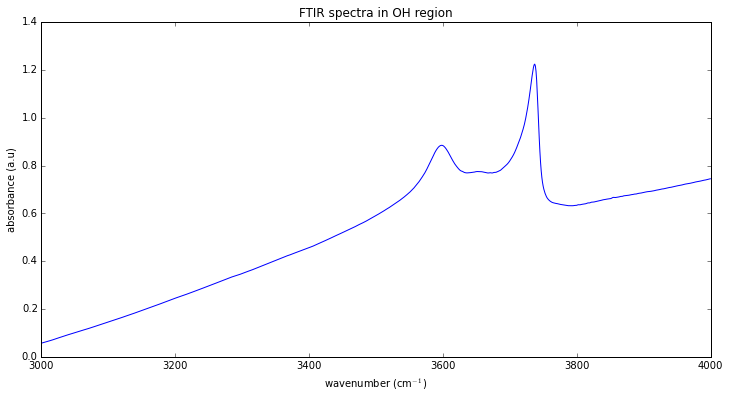

In [115]:
fig, ax = pl.subplots(figsize=(12,6))
w = data[mask_oh,0]
a = data[mask_oh,1]
ax.plot(w, a)
ax.set_title('FTIR spectra in OH region')
ax.set_xlabel('wavenumber (cm$^{-1}$)')
ax.set_ylabel('absorbance (a.u)');

## Reshaping, resizing and stacking arrays

The shape of an Numpy array can be modified without copying the underlaying data, which makes it a fast operation even for large arrays.

In [116]:
A

array([[  0.00000000e+00,   3.09016994e-01,   5.87785252e-01,
          8.09016994e-01,   9.51056516e-01],
       [  1.96438672e-15,   3.09016994e-01,   5.87785252e-01,
          8.09016994e-01,   9.51056516e-01],
       [  7.85754689e-15,   3.09016994e-01,   5.87785252e-01,
          8.09016994e-01,   9.51056516e-01],
       [ -1.52850776e-13,   3.09016994e-01,   5.87785252e-01,
          8.09016994e-01,   9.51056516e-01],
       [  3.14301876e-14,   3.09016994e-01,   5.87785252e-01,
          8.09016994e-01,   9.51056516e-01]])

In [117]:
n, m = A.shape

In [118]:
B = A.reshape((1,n*m))
B

array([[  0.00000000e+00,   3.09016994e-01,   5.87785252e-01,
          8.09016994e-01,   9.51056516e-01,   1.96438672e-15,
          3.09016994e-01,   5.87785252e-01,   8.09016994e-01,
          9.51056516e-01,   7.85754689e-15,   3.09016994e-01,
          5.87785252e-01,   8.09016994e-01,   9.51056516e-01,
         -1.52850776e-13,   3.09016994e-01,   5.87785252e-01,
          8.09016994e-01,   9.51056516e-01,   3.14301876e-14,
          3.09016994e-01,   5.87785252e-01,   8.09016994e-01,
          9.51056516e-01]])

In [119]:
B[0,0:5] = 5 # modify the array

B

array([[  5.00000000e+00,   5.00000000e+00,   5.00000000e+00,
          5.00000000e+00,   5.00000000e+00,   1.96438672e-15,
          3.09016994e-01,   5.87785252e-01,   8.09016994e-01,
          9.51056516e-01,   7.85754689e-15,   3.09016994e-01,
          5.87785252e-01,   8.09016994e-01,   9.51056516e-01,
         -1.52850776e-13,   3.09016994e-01,   5.87785252e-01,
          8.09016994e-01,   9.51056516e-01,   3.14301876e-14,
          3.09016994e-01,   5.87785252e-01,   8.09016994e-01,
          9.51056516e-01]])

In [120]:
A # and the original variable is also changed. B is only a different view of the same data

array([[  5.00000000e+00,   5.00000000e+00,   5.00000000e+00,
          5.00000000e+00,   5.00000000e+00],
       [  1.96438672e-15,   3.09016994e-01,   5.87785252e-01,
          8.09016994e-01,   9.51056516e-01],
       [  7.85754689e-15,   3.09016994e-01,   5.87785252e-01,
          8.09016994e-01,   9.51056516e-01],
       [ -1.52850776e-13,   3.09016994e-01,   5.87785252e-01,
          8.09016994e-01,   9.51056516e-01],
       [  3.14301876e-14,   3.09016994e-01,   5.87785252e-01,
          8.09016994e-01,   9.51056516e-01]])

We can also use the function `flatten` to make a higher-dimensional array into a vector. But this function create a copy of the data.

In [121]:
B = A.flatten()

B

array([  5.00000000e+00,   5.00000000e+00,   5.00000000e+00,
         5.00000000e+00,   5.00000000e+00,   1.96438672e-15,
         3.09016994e-01,   5.87785252e-01,   8.09016994e-01,
         9.51056516e-01,   7.85754689e-15,   3.09016994e-01,
         5.87785252e-01,   8.09016994e-01,   9.51056516e-01,
        -1.52850776e-13,   3.09016994e-01,   5.87785252e-01,
         8.09016994e-01,   9.51056516e-01,   3.14301876e-14,
         3.09016994e-01,   5.87785252e-01,   8.09016994e-01,
         9.51056516e-01])

In [122]:
B[0:5] = 10

B

array([  1.00000000e+01,   1.00000000e+01,   1.00000000e+01,
         1.00000000e+01,   1.00000000e+01,   1.96438672e-15,
         3.09016994e-01,   5.87785252e-01,   8.09016994e-01,
         9.51056516e-01,   7.85754689e-15,   3.09016994e-01,
         5.87785252e-01,   8.09016994e-01,   9.51056516e-01,
        -1.52850776e-13,   3.09016994e-01,   5.87785252e-01,
         8.09016994e-01,   9.51056516e-01,   3.14301876e-14,
         3.09016994e-01,   5.87785252e-01,   8.09016994e-01,
         9.51056516e-01])

In [123]:
A # now A has not changed, because B's data is a copy of A's, not refering to the same data

array([[  5.00000000e+00,   5.00000000e+00,   5.00000000e+00,
          5.00000000e+00,   5.00000000e+00],
       [  1.96438672e-15,   3.09016994e-01,   5.87785252e-01,
          8.09016994e-01,   9.51056516e-01],
       [  7.85754689e-15,   3.09016994e-01,   5.87785252e-01,
          8.09016994e-01,   9.51056516e-01],
       [ -1.52850776e-13,   3.09016994e-01,   5.87785252e-01,
          8.09016994e-01,   9.51056516e-01],
       [  3.14301876e-14,   3.09016994e-01,   5.87785252e-01,
          8.09016994e-01,   9.51056516e-01]])

## Adding a new dimension: newaxis

With `newaxis`, we can insert new dimensions in an array, for example converting a vector to a column or row matrix:

In [126]:
v = np.array([1,2,3])

In [128]:
np.shape(v)

(3,)

In [130]:
# make a column matrix of the vector v
v[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [131]:
# column matrix
v[:,np.newaxis].shape

(3, 1)

In [133]:
# row matrix
v[np.newaxis,:].shape

(1, 3)

## Stacking and repeating arrays

Using function `repeat`, `tile`, `vstack`, `hstack`, and `concatenate` we can create larger vectors and matrices from smaller ones:

### tile and repeat

In [135]:
a = np.array([[1, 2], [3, 4]])

In [139]:
# repeat each element 3 times
np.repeat(a, 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [137]:
# tile the matrix 3 times 
np.tile(a, 3)

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

### concatenate

In [141]:
b = np.array([[5, 6]])

In [142]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [143]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

### hstack and vstack

In [144]:
np.vstack((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [145]:
np.hstack((a,b.T))

array([[1, 2, 5],
       [3, 4, 6]])

## Copy and "deep copy"

To achieve high performance, assignments in Python usually do not copy the underlaying objects. This is important for example when objects are passed between functions, to avoid an excessive amount of memory copying when it is not necessary (techincal term: pass by reference). 

In [146]:
A = np.array([[1, 2], [3, 4]])

A

array([[1, 2],
       [3, 4]])

In [147]:
# now B is referring to the same array data as A 
B = A 

In [148]:
# changing B affects A
B[0,0] = 10

B

array([[10,  2],
       [ 3,  4]])

In [ ]:
A

If we want to avoid this behavior, so that when we get a new completely independent object `B` copied from `A`, then we need to do a so-called "deep copy" using the function `copy`:

In [150]:
B = np.copy(A)

In [151]:
# now, if we modify B, A is not affected
B[0,0] = -5

B

array([[-5,  2],
       [ 3,  4]])

In [152]:
A

array([[10,  2],
       [ 3,  4]])

## Iterating over array elements

Generally, we want to avoid iterating over the elements of arrays whenever we can (at all costs). The reason is that in a interpreted language like Python (or MATLAB), iterations are really slow compared to vectorized operations. 

However, sometimes iterations are unavoidable. For such cases, the Python `for` loop is the most convenient way to iterate over an array:

In [154]:
v = np.array([1,2,3,4])

for element in v:
    print(element)

1
2
3
4


In [156]:
M = np.array([[1,2], [3,4]])

for row in M:
    print("row", row)
    
    for element in row:
        print(element)

('row', array([1, 2]))
1
2
('row', array([3, 4]))
3
4


When we need to iterate over each element of an array and modify its elements, it is convenient to use the `enumerate` function to obtain both the element and its index in the `for` loop: 

In [157]:
for row_idx, row in enumerate(M):
    print("row_idx", row_idx, "row", row)
    
    for col_idx, element in enumerate(row):
        print("col_idx", col_idx, "element", element)
       
        # update the matrix M: square each element
        M[row_idx, col_idx] = element ** 2

('row_idx', 0, 'row', array([1, 2]))
('col_idx', 0, 'element', 1)
('col_idx', 1, 'element', 2)
('row_idx', 1, 'row', array([3, 4]))
('col_idx', 0, 'element', 3)
('col_idx', 1, 'element', 4)


In [158]:
# each element in M is now squared
M

array([[ 1,  4],
       [ 9, 16]])

## Performance

In [164]:
%%timeit
M = np.array([[1,2], [3,4]])
for row_idx, row in enumerate(M):
    for col_idx, element in enumerate(row):
        # update the matrix M: square each element
        M[row_idx, col_idx] = element ** 2

100000 loops, best of 3: 9.3 µs per loop


In [165]:
M

array([[1, 2],
       [3, 4]])

In [166]:
M = np.array([[1,2], [3,4]])
%timeit M*M

The slowest run took 19.06 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 475 ns per loop


In [167]:
M

array([[1, 2],
       [3, 4]])

## Using arrays in conditions

When using arrays in conditions in for example `if` statements and other boolean expressions, one need to use one of `any` or `all`, which requires that any or all elements in the array evalutes to `True`:

In [168]:
M

array([[1, 2],
       [3, 4]])

In [ ]:
if (M > 5).any():
    print("at least one element in M is larger than 5")
else:
    print("no element in M is larger than 5")

In [ ]:
if (M > 5).all():
    print("all elements in M are larger than 5")
else:
    print("all elements in M are not larger than 5")

## Further reading

* [http://numpy.scipy.org](http://numpy.scipy.org)


* [http://scipy.org/Tentative_NumPy_Tutorial](http://scipy.org/Tentative_NumPy_Tutorial)


* http://scipy.org/NumPy_for_Matlab_Users - A Numpy guide for MATLAB users.